<a href="https://colab.research.google.com/github/amrutask/Machine_Learning/blob/master/HomeWork1/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
class softmax():
  
  def __init__(self, size, no_classes):
    
    self.weights = np.zeros((size, no_classes))
    self.bias = np.zeros((no_classes,1))
    self.accuracy=0.0
      
  
  def train_and_optimize(self, train_x, train_y, no_classes, learning_rate=0.5, num_iters=50, mini_batch_size=200):
    
    w = np.zeros((train_x.shape[0],no_classes))
    b=np.zeros((no_classes,1))
    m = train_x.shape[1]   #no of training smaples
    print("No of training examples:", m)
    num_batches=int(m/mini_batch_size)
    costs=[] 
    
    #mini batch gradient descent
    for i in range(num_iters):
      
      batch_cost=[]
      shuffled_indices = np.random.permutation(m)       
      train_x = train_x[:,shuffled_indices]
      train_y = train_y[shuffled_indices, :]
      
      start=0
      end=mini_batch_size-1
      
      for j in range(num_batches):
        X=train_x[:, start:end]
        Y=train_y[start:end, :]
        Z=np.dot(w.transpose(),X)+ b
        x_exp = np.exp(Z)
        x_sum = np.sum(x_exp, axis=0, keepdims=True)

        A = x_exp / x_sum  # compute activation
        cost = (-1/mini_batch_size) *  np.sum(np.multiply(Y.transpose(), np.log(A)) + np.multiply((1-Y).transpose(), np.log(1-A)))
        #print(cost)
        temp=np.subtract(A,Y.transpose())
        dw = (1/mini_batch_size) * X.dot(temp.transpose())
        db = (1/mini_batch_size) * np.sum(temp)
       
        cost = np.squeeze(cost)
  
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        batch_cost.append(cost)
        start=start+mini_batch_size
        end=end+mini_batch_size
        
      costs.append(sum(batch_cost) / len(batch_cost))
    
      if i%25==0 or i==num_iters-1:
        print("Cost after {} iterations: {}".format(i, sum(costs)/len(costs)))
    
    self.weights=w
    self.bias=b
    
 
  def predict(self, test_x, Label):
  
    Z=(np.dot(self.weights.transpose(),test_x)+ self.bias)
    x_exp = np.exp(Z)
    x_sum = np.sum(x_exp, axis=0, keepdims=True)
    A = x_exp / x_sum  # compute activation
    m = test_x.shape[1]
    
    pred=np.argmax(A, axis=0)
    self.accuracy=((np.sum(pred==Label))/m) * 100
    
    return(self.accuracy)
  
  
  def calc_probability(self, image_features):
    Z=(np.dot(self.weights.transpose(),image_features)+ self.bias)
    x_exp = np.exp(Z)
    x_sum = np.sum(x_exp, keepdims=True)
    A = x_exp / x_sum  # compute activation
    num=np.argmax(A)
    
    return(num)

In [60]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

train_x_flat = x_train.reshape(x_train.shape[0],-1).T
test_x_flat = x_test.reshape(x_test.shape[0],-1).T

train_x = train_x_flat / 255
test_x = test_x_flat / 255
print("Size of training data:",train_x.shape)
print("Size of test data:",y_test.shape)

#one hot encoding of the labels
train_y= np.eye(10)[y_train]

print("Size of training labels:", train_y.shape)
print("Size of test labels:", test_y.shape)

no_classes=10  #0 to 9 digits

sfm=softmax(train_x.shape[0], no_classes)
print("\nTraining..............")
sfm.train_and_optimize(train_x, train_y, no_classes)
acc=sfm.predict(test_x, y_test)
print("\nAccuracy: {}".format(acc))

  

Size of training data: (784, 60000)
Size of test data: (10000,)
Size of training labels: (60000, 10)
Size of test labels: (10000, 10)

Training..............
No of training examples: 60000
Cost after 0 iterations: 0.7245901791509004
Cost after 25 iterations: 0.4726355832168215
Cost after 49 iterations: 0.4515488233280183

Accuracy: 92.31


Enter any image from 0 to 60000 for prediction: 2468

Predicted number is: 3


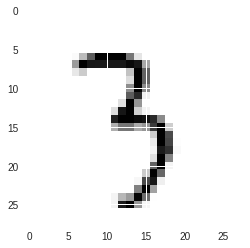

In [64]:
No_to_predict = input("Enter any image from 0 to 60000 for prediction: ")

plt.imshow(train_x[:,int(No_to_predict)].reshape((28,28)))

num=sfm.calc_probability(train_x[:,int(No_to_predict)])

  
print("\nPredicted number is:",num)
  